# RIYA JINDAL TASK : 2
## PREDICTION USING UNSUPERVISED ML

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### LOADING THE IRIS DATASET

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### NOW THE QUESTION IS , How do you find the optimum number of clusters for K Means? How does one determine the value of K?

##### WE ARE CONSIDERING DIFFERENT VALUES OF K TO SEE HOW CLUSTERS ARE FORMED. FIRST WE HAVE CONSIDERED K = 2 !

In [3]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=2)
k_mean.fit(iris_df)

KMeans(n_clusters=2)

In [4]:
identified_clusters = k_mean.fit_predict(iris_df)
iris_df['cluster_int']= identified_clusters

In [5]:
k_mean.inertia_

152.34795176035797

###### Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_int
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [13]:
df = pd.DataFrame({'x': iris.data[:,0], 'y': iris.data[:,1], 'cluster':iris.target})

In [14]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


#### PLOTTING THE GRAPH WITH K = 2

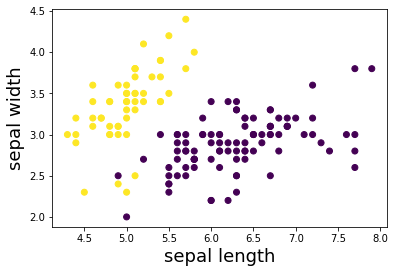

In [16]:
plt.scatter(df['x'], df['y'], c= iris_df['cluster_int'])
plt.xlabel('sepal length',fontsize=18)
plt.ylabel('sepal width',fontsize=18)
plt.show()

#### NOW WE ARE CONSIDERING THE VALUE OF K AS 4 TO SEE HOW CLUSTERS ARE FORMED.

In [17]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=4)
k_mean.fit(iris_df)
identified_clusters = k_mean.fit_predict(iris_df)
iris_df['cluster_int1']= identified_clusters


In [19]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_int,cluster_int1
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,3
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,3


In [20]:
k_mean.inertia_

59.90704464285715

#### WE CAN CLEARLY SEE THAT AS WE INCREASED THE VALUE OF K, THE INERTIA DECREASED. 

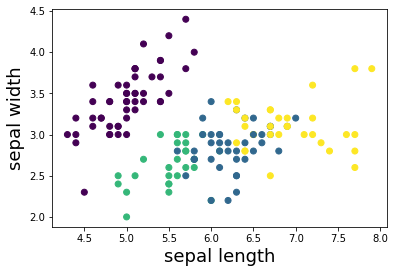

In [21]:
plt.scatter(df['x'], df['y'], c= iris_df['cluster_int1'])
plt.xlabel('sepal length',fontsize=18)
plt.ylabel('sepal width',fontsize=18)
plt.show()

#### BUT IS K = 4 , THE OPTIMUM NUMBER OF CLUSTERS?
#### Finding the optimum number of clusters for k-means classification.

In [28]:
wss =[]
for i in range(1,10):
    from sklearn.cluster import KMeans
    k_mean = KMeans(n_clusters = i)
    k_mean.fit(iris_df)
    wss.append(k_mean.inertia_)

C:\Users\riya jindal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


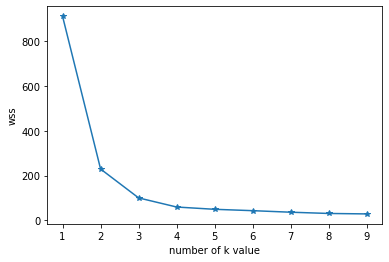

In [29]:
plt.plot([1,2,3,4,5,6,7,8,9],wss, marker ='*')
plt.xlabel('number of k value')
plt.ylabel('wss')
plt.show()

### WE ARE USING THE ELBOW METHOD HERE.
#### WE can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### From this we choose the number of clusters as ** '3**'.

In [30]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=3)
k_mean.fit(iris_df)
identified_clusters = k_mean.fit_predict(iris_df)
iris_df['cluster_int2']= identified_clusters

In [31]:
k_mean.inertia_

100.51429044117648

#### PLOTTING THE GRAPH TAKING THE OPTIMUM VALUE OF K AS 3. WE HAVE ALSO PLOTTED THE CENTROIDS WITH THE RED COLOR SO THAT WE CAN EASILY SEE WHERE OUR CENTROIDS LIE !

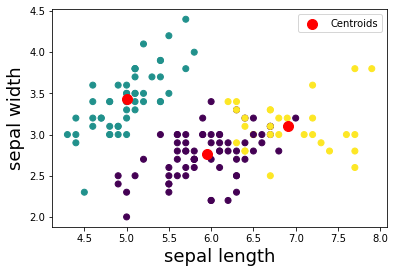

In [35]:
plt.scatter(df['x'], df['y'], c= iris_df['cluster_int2'])
plt.xlabel('sepal length',fontsize=18)
plt.ylabel('sepal width',fontsize=18)
plt.scatter(k_mean.cluster_centers_[:, 0], k_mean.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

#### THIS CONCLUDES UNSUPERVISED ML USING KMeans.
##### TASK 2 COMPLETED !